In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


About Dataset
Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000
productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
Target : Failure or Not
Failure Type : Type of Failure
Acknowledgements
UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [2]:
#Datasetimizi içeri aldık.
df = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
#Datasetimizin bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
#ilk beş veri görüntüleme
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
#  Sıcaklığı Kelvinden Dereceye çevirme
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [7]:
#Sıcaklık farkını incelemek için ayrı bir sütun ekliyoruz.
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.head()

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,M14860,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,2,L47181,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,3,L47182,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,4,L47183,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,5,L47184,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [8]:
#istatistiksel veriler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
Air temperature [°C],10000.0,27.85493,2.000259,23.15,26.15,27.95,29.35,32.35
Process temperature [°C],10000.0,37.85556,1.483734,33.55,36.65,37.95,38.95,41.65
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.00,1423.00,1503.00,1612.00,2886.00
Torque [Nm],10000.0,39.98691,9.968934,3.80,33.20,40.10,46.80,76.60
Tool wear [min],10000.0,107.95100,63.654147,0.00,53.00,108.00,162.00,253.00
Target,10000.0,0.03390,0.180981,0.00,0.00,0.00,0.00,1.00
Temperature difference [°C],10000.0,10.00063,1.001094,7.60,9.30,9.80,11.00,12.10


**VERİ GÖRSELLEŞTİRME**

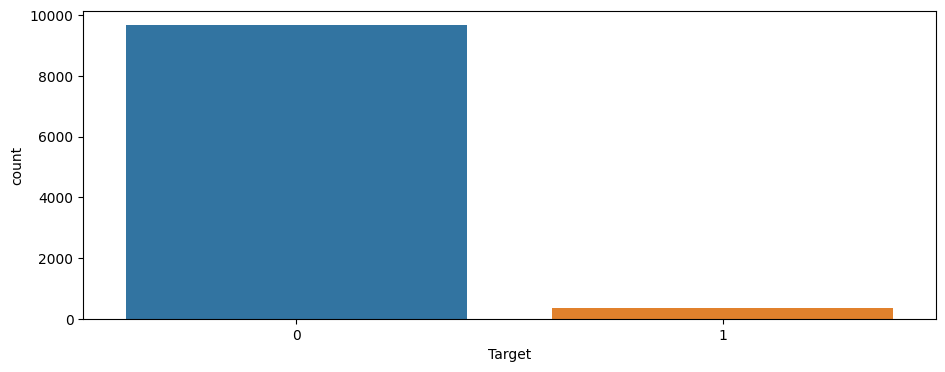

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11,4))
label_fontsize = 5
sns.countplot( data=df, x='Target')
plt.show()

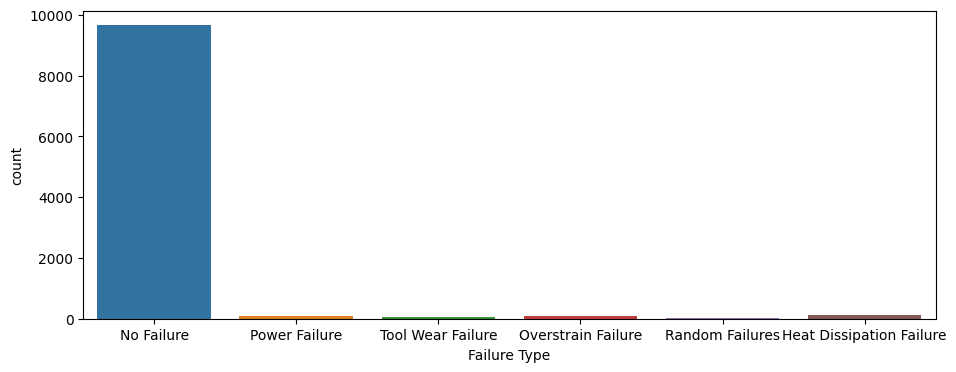

In [10]:
plt.figure(figsize=(11,4))
label_fontsize = 5
sns.countplot( data=df, x='Failure Type')
plt.show()

**Hedef özelliğin aşırı dengesiz olduğunu görebiliyoruz, bu da nadiren meydana gelen Arıza Türleri üzerinde modeli eğitmeyi çok zorlaştıracaktır.**

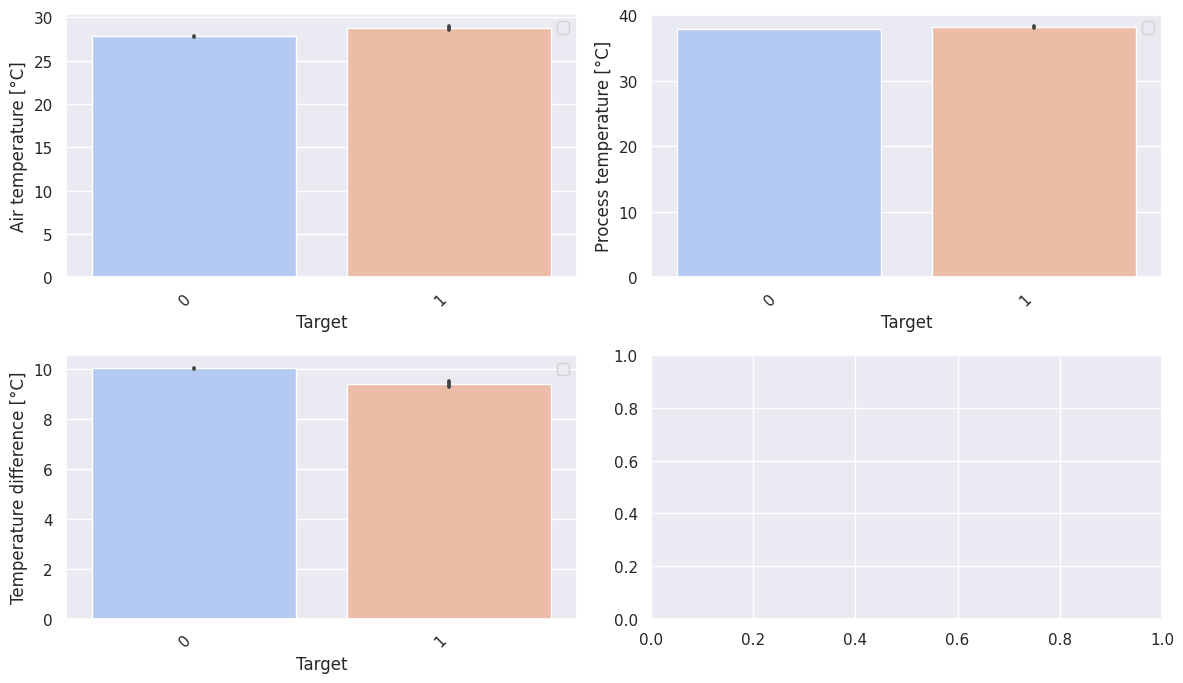

In [11]:
# Target ile features arasındaki ilişkinin araştırılması.

sns.set(style="darkgrid")
label_fontsize = 4

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.barplot(data=df,x="Target", y="Air temperature [°C]", palette="coolwarm",ax=axes[0,0])
axes[0,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Target", y="Process temperature [°C]", palette="coolwarm",ax=axes[0,1])
axes[0,1].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Target", y="Temperature difference [°C]", palette="coolwarm",ax=axes[1,0])
axes[1,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,0].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha="right")


plt.tight_layout()

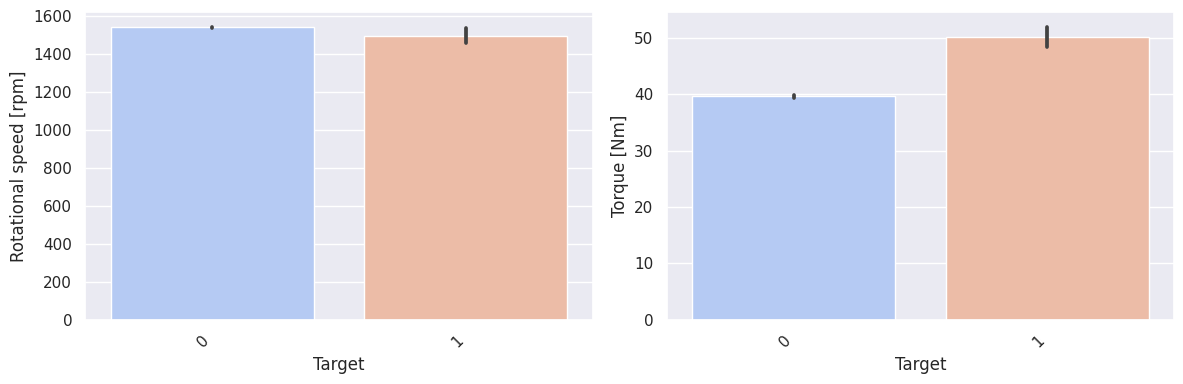

In [12]:
sns.set(style="darkgrid")
label_fontsize = 4

#fig, axes = plt.subplots(2, 2, figsize=(8, 4))
fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

sns.barplot(data=df,x="Target", y="Rotational speed [rpm]", palette="coolwarm", ax=axes[0])
# Rotate x-axis labels
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Target", y="Torque [Nm]", palette="coolwarm",ax=axes[1])
# Rotate x-axis labels
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()

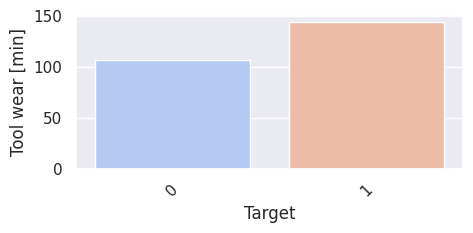

In [13]:
sns.set(style="darkgrid")
label_fontsize = 4

plt.figure(figsize=(5,2))

sns.barplot(data=df,x="Target", y="Tool wear [min]",errorbar=None, palette="coolwarm")
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

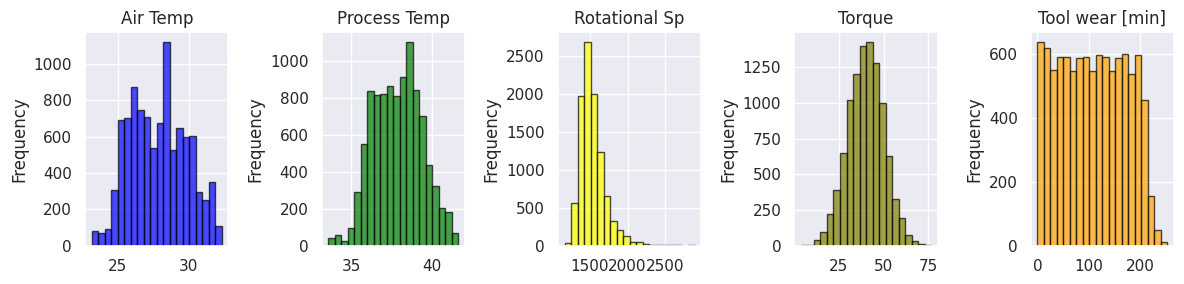

In [14]:
#Tablonun hatalarla ilişkili sayısal verilerini inceleyelim

# Histogram for Air Temp
plt.figure(figsize=(12,3))

plt.subplot(1, 5, 1)
plt.hist(df['Air temperature [°C]'], color='blue',bins=20, edgecolor='black', alpha=0.7)
plt.title('Air Temp')
#plt.xlabel('Air Temp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Process Temp
plt.subplot(1, 5, 2)
plt.hist(df['Process temperature [°C]'],bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Process Temp')
#plt.xlabel('Process Temp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Rotational Speed
plt.subplot(1, 5, 3)
plt.hist(df['Rotational speed [rpm]'], bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Rotational Sp')
#plt.xlabel('Rotational Sp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 4)
plt.hist(df['Torque [Nm]'], bins=20, color='olive', edgecolor='black', alpha=0.7)
plt.title('Torque')
#plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 5)
plt.hist(df['Tool wear [min]'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Tool wear [min]')
#plt.xlabel('Tool wear')
plt.ylabel('Frequency')
plt.grid(True)


plt.tight_layout()
plt.show()

<Axes: >

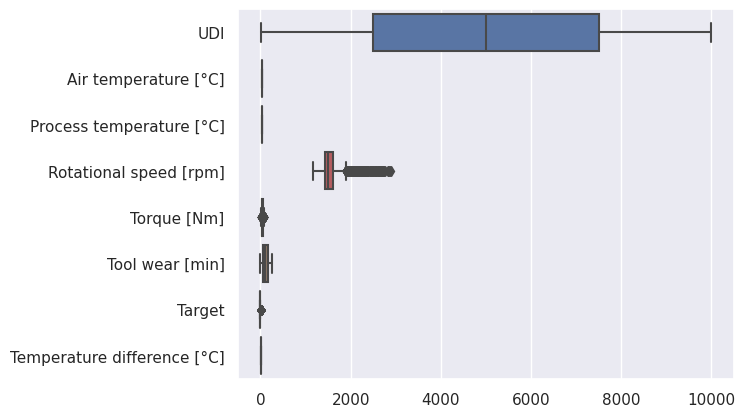

In [15]:
#Desenleri veya Anomalileri Gözlemlemek İçin Özellik Dağılımlarını Çizme

sns.boxplot(data=df, orient="h")
#"h" horizontal/yatay olduğunu gösteriyor.
#df datasetimin aykırı değerleri

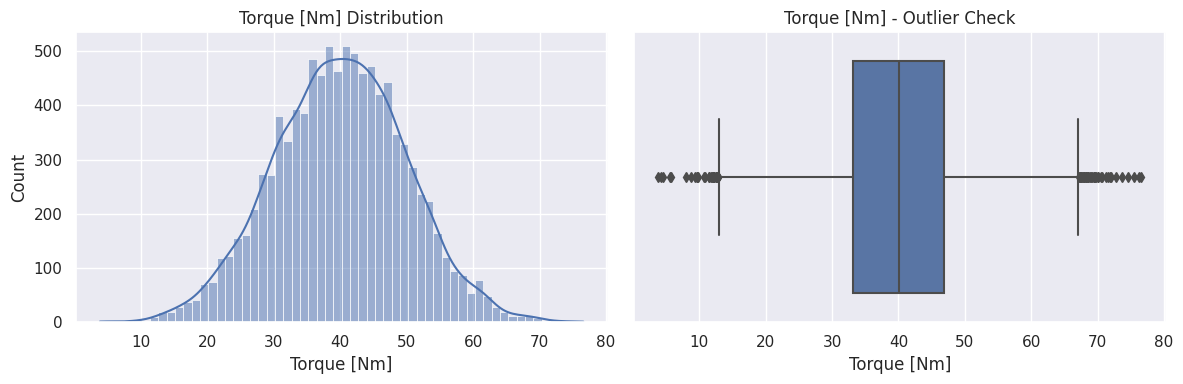

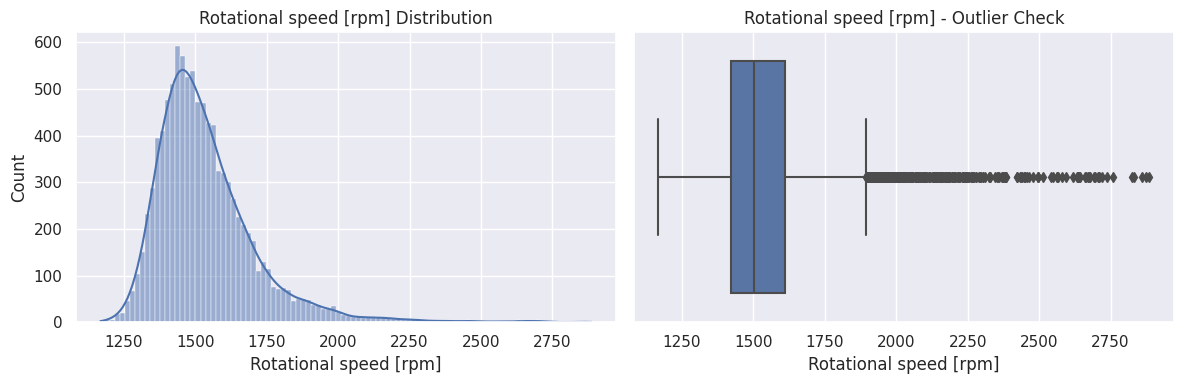

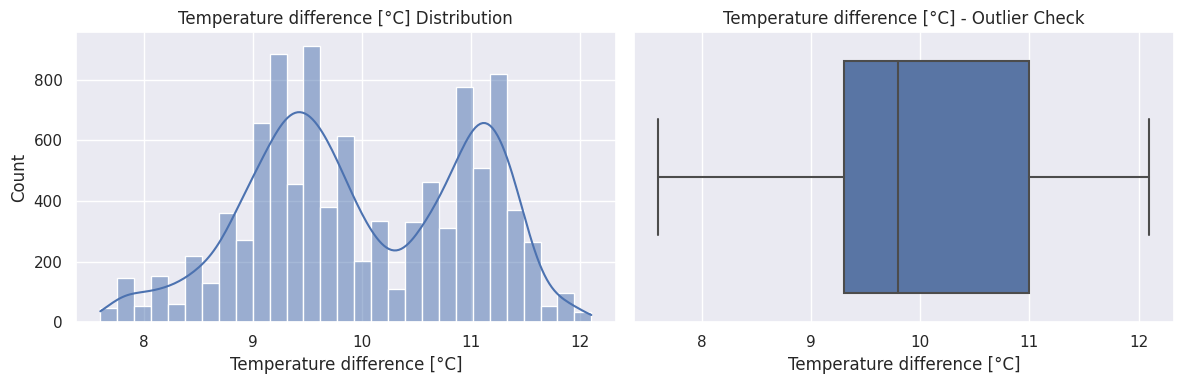

In [16]:
cols = ['Torque [Nm]', 'Rotational speed [rpm]', 'Temperature difference [°C]']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

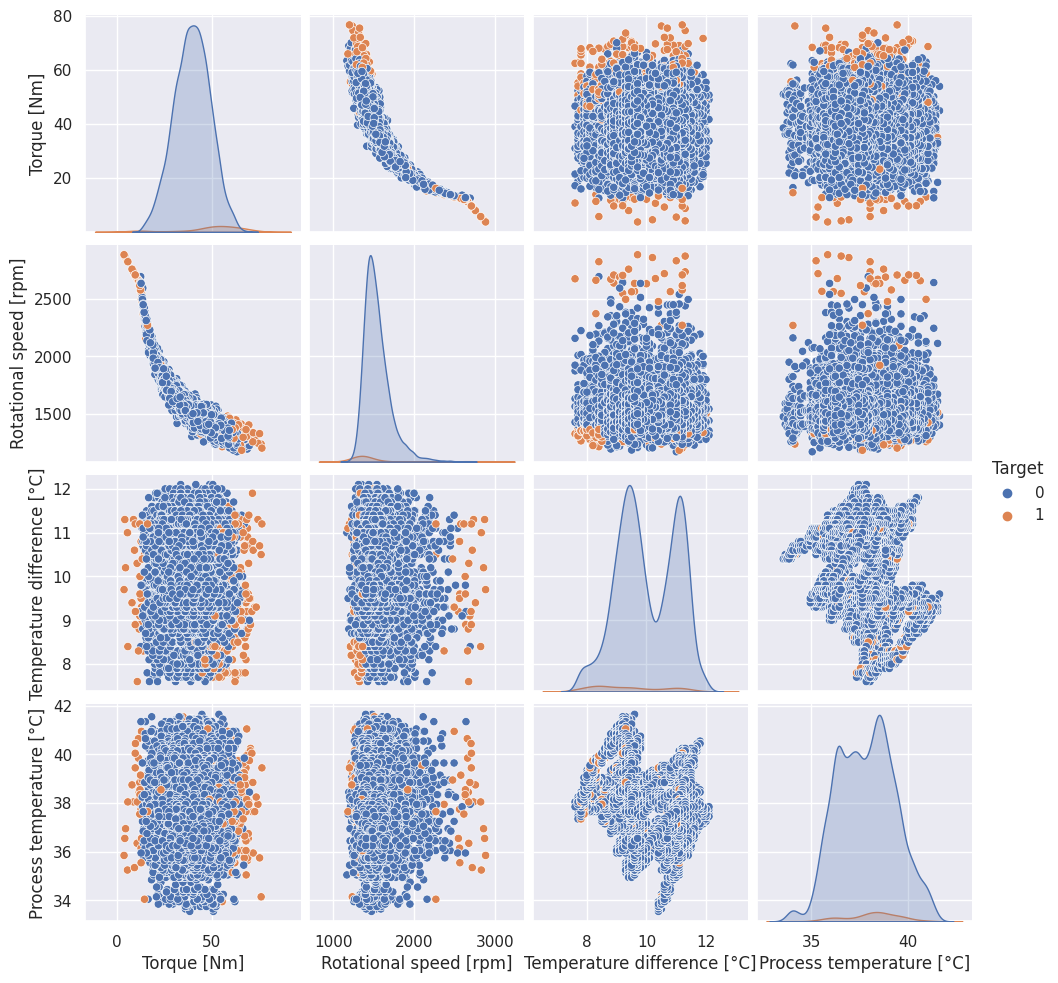

In [17]:
sns.pairplot(df[['Torque [Nm]', 'Rotational speed [rpm]', 'Temperature difference [°C]', 'Target', 'Process temperature [°C]']], hue='Target')
plt.show()

In [18]:
#Encoding Öncesi Veri

df.head()

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,M14860,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,2,L47181,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,3,L47182,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,4,L47183,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,5,L47184,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [19]:
#Target Sütununa Label Encoding işlemi

from sklearn.preprocessing import LabelEncoder
data = df.copy()

def labelEncoder():
    le = LabelEncoder()
    data["Target"] = le.fit_transform(data["Target"])
    return data.head()

labelEncoder()

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,M14860,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,2,L47181,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,3,L47182,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,4,L47183,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,5,L47184,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


**KULLANILMAYACAK FEATURELARI SİLME İŞLEMİ**

In [20]:
data.drop("Failure Type", axis = 1, inplace = True)

In [21]:
data.drop("UDI", axis = 1, inplace = True )

In [22]:
data.drop("Product ID", axis = 1, inplace = True)

In [23]:
data.drop("Type", axis = 1, inplace = True)

In [24]:
data.drop("Air temperature [°C]", axis = 1, inplace = True)

In [25]:
data.drop("Tool wear [min]", axis = 1, inplace = True)

In [26]:
data.head()

,Process temperature [°C],Rotational speed [rpm],Torque [Nm],Target,Temperature difference [°C]
0,36.45,1551,42.8,0,10.5
1,36.55,1408,46.3,0,10.5
2,36.35,1498,49.4,0,10.4
3,36.45,1433,39.5,0,10.4
4,36.55,1408,40.0,0,10.5


**FEATURES VE LABEL BELİRLEME**

In [27]:
X = data[["Process temperature [°C]", "Temperature difference [°C]", "Rotational speed [rpm]", "Torque [Nm]"]] #Features
y = data[["Target"]] #Label

print("X: ", X)
print("Y: ", y)

X:        Process temperature [°C]  Temperature difference [°C]  \
0                        36.45                         10.5   
1                        36.55                         10.5   
2                        36.35                         10.4   
3                        36.45                         10.4   
4                        36.55                         10.5   
...                        ...                          ...   
9995                     36.25                          9.6   
9996                     36.25                          9.5   
9997                     36.45                          9.6   
9998                     36.55                          9.7   
9999                     36.55                          9.7   

      Rotational speed [rpm]  Torque [Nm]  
0                       1551         42.8  
1                       1408         46.3  
2                       1498         49.4  
3                       1433         39.5  
4                  

**SİSTEMİ ŞİŞİRMEMEK İÇİN SCALE İŞLEMİ**

In [28]:
from sklearn.preprocessing import MinMaxScaler

scalemm = MinMaxScaler()
X = scalemm.fit_transform(X)

print(X)


[[0.35802469 0.64444444 0.22293364 0.53571429]
 [0.37037037 0.64444444 0.13969732 0.58379121]
 [0.34567901 0.62222222 0.19208382 0.62637363]
 ...
 [0.35802469 0.44444444 0.27764843 0.40659341]
 [0.37037037 0.46666667 0.13969732 0.61401099]
 [0.37037037 0.46666667 0.19324796 0.5       ]]


**VERİMİZİ TRAIN VE TEST OLARAK AYIRIYORUZ**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)


**KULLANACAĞIMIZ ML ALGORİTMALARINI TANIMLIYORUZ**

In [30]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('SGD', SGDClassifier()),
    ('RF', RandomForestClassifier())
]

print(type(models))

#modelden gelen sonuçları tutacağımız liste
results = list()
print(type(results))

#hangi algoritmanın doğruluk oranını göreceğimiz isim listesi
names = []
print(type(names))


<class 'list'>
<class 'list'>
<class 'list'>


**KFOLD**

In [31]:
for name, model in models :
    kfold = model_selection.KFold(shuffle=True, n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    print(name," ", cv_results.mean())

LR   0.9653750000000001
LDA   0.96675
KNN   0.973625
DT   0.9721249999999999
NB   0.9586250000000002
SVM   0.971125
SGD   0.9652499999999999
RF   0.983125


**En yüksek Random Forest geldi onunla devam edeceğiz.**

In [32]:
rfc = RandomForestClassifier(n_estimators = 150, random_state = 5)
rfc.fit(X_train, y_train)
print("skor = ", rfc.score(X_test, y_test))

skor =  0.983


In [33]:
y_predict = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.983

**CONFUSION MATRIX**

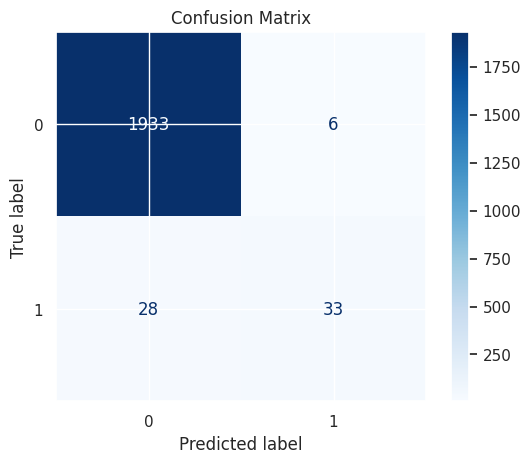

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()